# En 1D el laplaciano con pesos

$$ \partial_t^2 u(x,t) = \Delta u(x,t) = \nabla \cdot (c(x,t) \nabla u(x,t))$$

$$\Delta_h u_i^n = \frac{1}{\Delta x^2} (c_{i+1}(u_{i+1}^n-u_i^n)-c_i(u_i^n-u_{i-1}^n))$$

Entonces

$$u_{i}^{n+1} = 2u_{i}^n - u_{i}^{n-1} + \Delta t ^2 \Delta_h u_{i}^n$$

Condicion inicial $u_0(x)= \phi(x)$ y $\partial_t u_0(x)=\psi(x)$

Por $v=\partial_t u$ entonces 

$$u_{i}^1-u_{i}^{-1} = 2\Delta t \psi_{i}$$

y por el esquema

$$u_{i}^{1} + u_{i}^{-1}= 2\phi_{i}  + \Delta t ^2 \Delta_h \phi_{i}$$

Osea que

$$u_{i}^1 = \Delta t \psi_{i} + \phi_{i} + \frac{\Delta t^2}{2} \Delta_h\phi_{i}$$

Y si $\psi = 0$

$$u_{i}^1 = \phi_{i} + \frac{\Delta t^2}{2} \Delta_h\phi_{i}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(-1,1,150)
nt = 10000
u = np.zeros((nt,x.shape[0]))
c = np.zeros(x.shape[0])

In [3]:
dx = np.diff(x)[0]
cfl = 0.125

# Laplacian operator

$$\Delta_h u_i^n = \frac{1}{\Delta x^2} (c_{i+1}(u_{i+1}^n-u_i^n)-c_i(u_i^n-u_{i-1}^n))$$

In [4]:
def lapl(u,c,dx):
    return 1.0/dx/dx*(c[2:]*(u[2:]-u[1:-1])-c[1:-1]*(u[1:-1]-u[:-2]))

### Initial condition, topography and timestep

(0, 1.0)

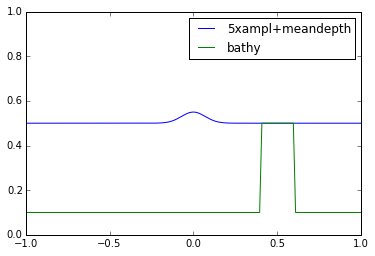

In [40]:
h0 = 0.5
h = 0.3*np.exp(-((x-0.5)**2)/0.01)+.1
h = np.where( np.abs(x-0.5)<=0.1, 0.5, 0.1)
# h += 0.2-0.2*np.exp(-((x+0.5)**2)/0.01)
c = np.sqrt(9.81*h)
dt = cfl*dx/c.max()

u[0,1:-1] = 0.01*np.exp(-((x[1:-1])**2)/0.01)+h0
u[0,1:-1] = np.where(u[0,1:-1]>h[1:-1],u[0,1:-1],h[1:-1])
plt.plot(x,5*(u[0,:]-0.5)+0.5,label='5xampl+meandepth')
plt.plot(x,h,label='bathy')
plt.legend(loc=0)
plt.ylim(0,2*h0)

### Boundary condition

In [41]:
u[0,0] = h0
u[0,-1] = h0

$$u_{i}^1 = \phi_{i} + \frac{\Delta t^2}{2} \Delta_h\phi_{i}$$

In [42]:
u[1,1:-1] = u[0,1:-1] + dt*dt/2.0*lapl(u[0,:],c,dx)

$$u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + \Delta t ^2 \nabla_h u_{i,j}^n$$

In [43]:
for n in range(1,nt-1):
    u[n,0] = u[n,1]
    u[n,-1] = u[n,-2]
    u[n+1,1:-1] = 2.0*u[n,1:-1] - u[n-1,1:-1] + dt*dt*lapl(u[n,:],c,dx)

In [44]:
u.shape

(10000, 150)

(-1.0, 1.0, 0.5, 0.505)

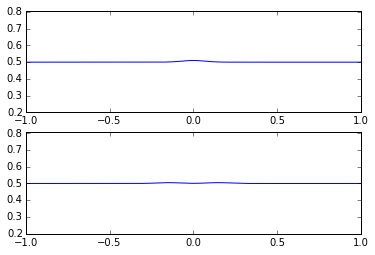

In [45]:
plt.subplot(211)
plt.plot(x,u[1,:])
plt.axis('equal')
plt.subplot(212)
plt.plot(x,u[200])
plt.axis('equal')


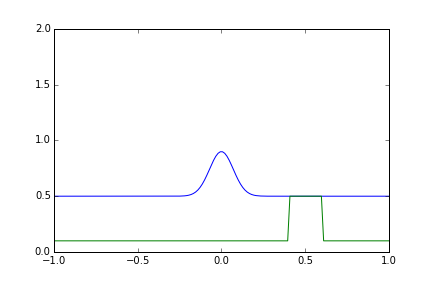
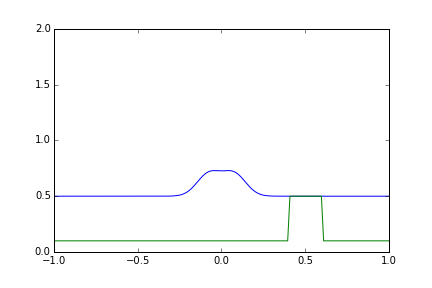
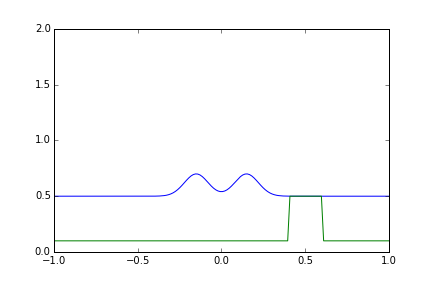
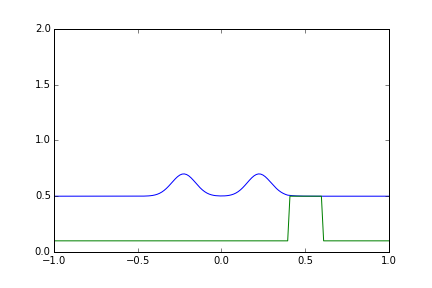
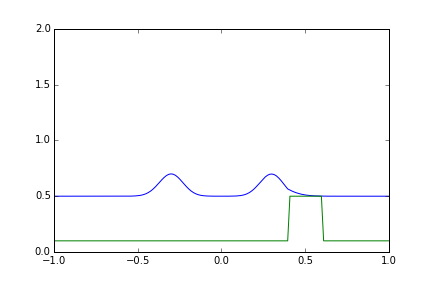
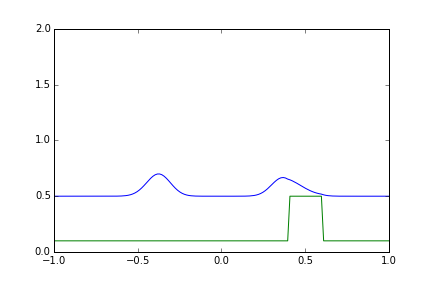
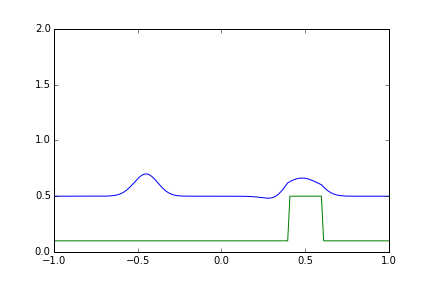
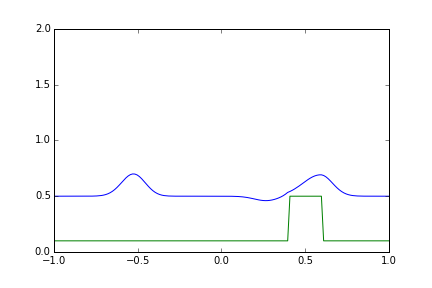
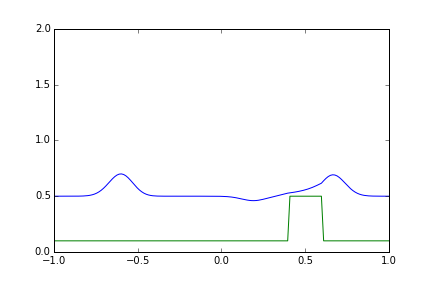
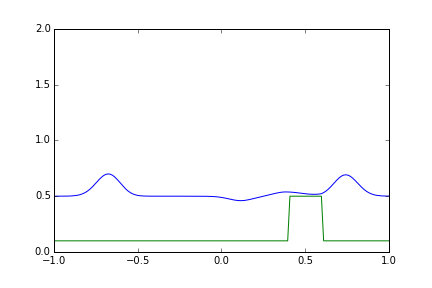
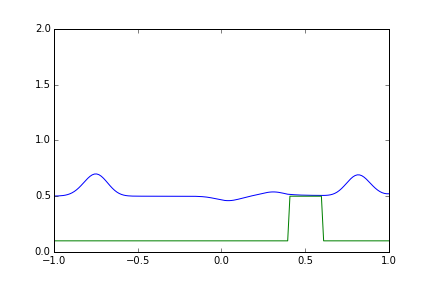
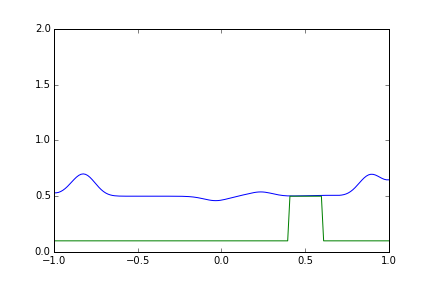
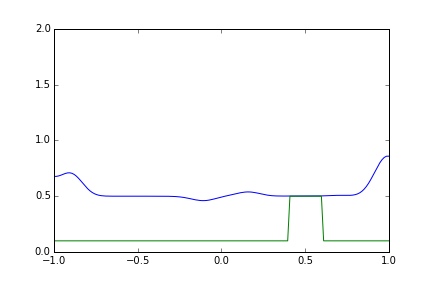
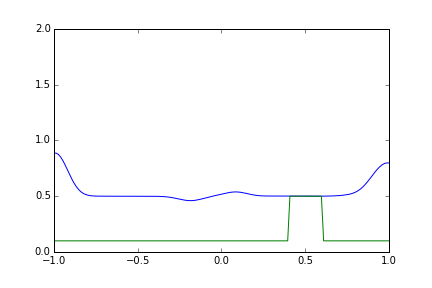
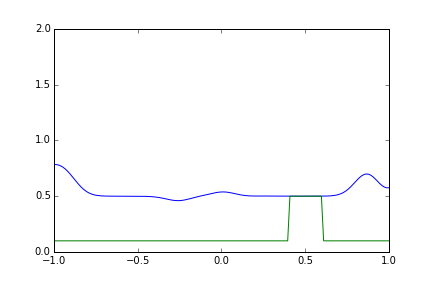
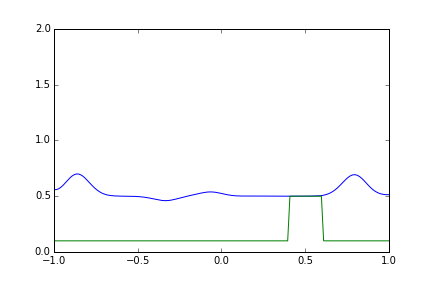
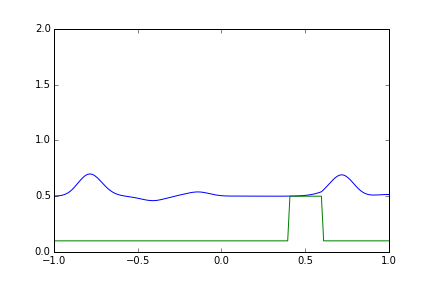
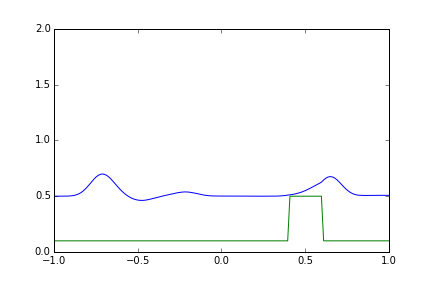
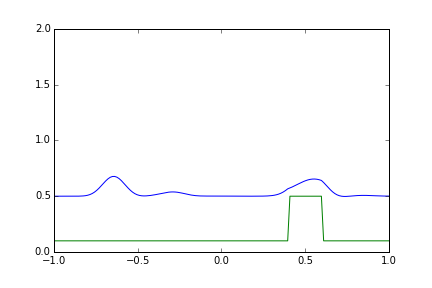
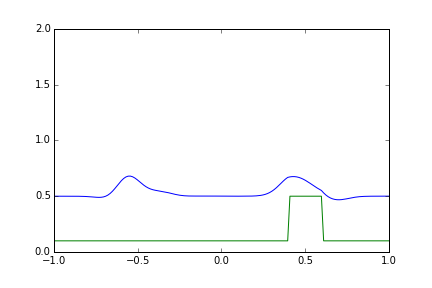
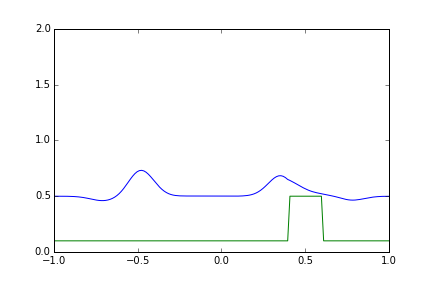
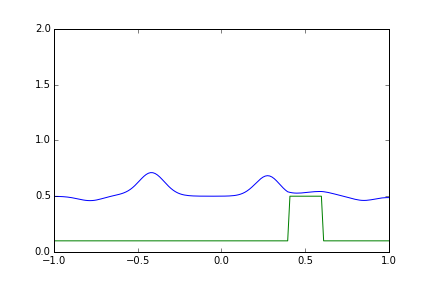
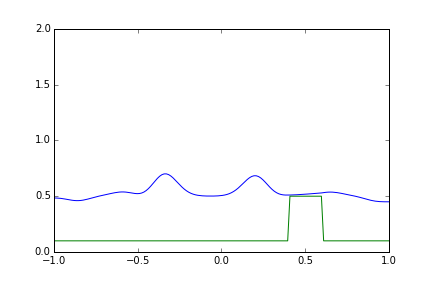
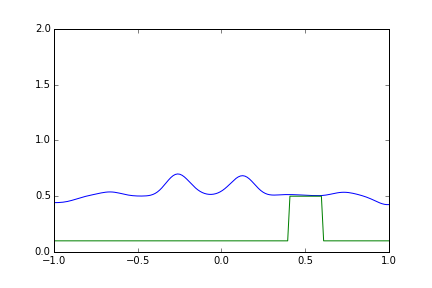
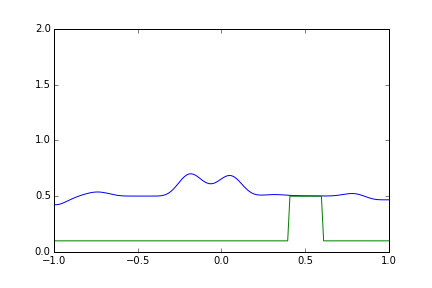
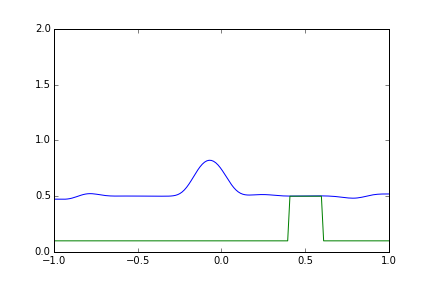
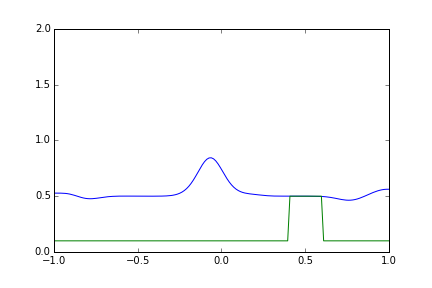
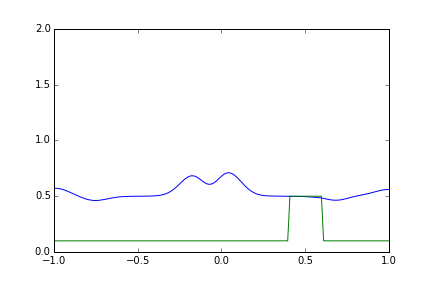
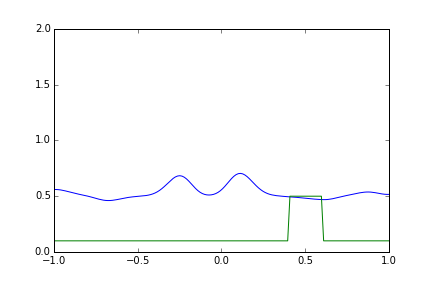
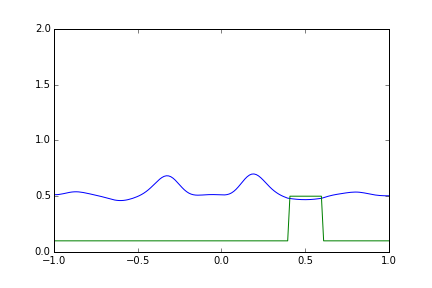
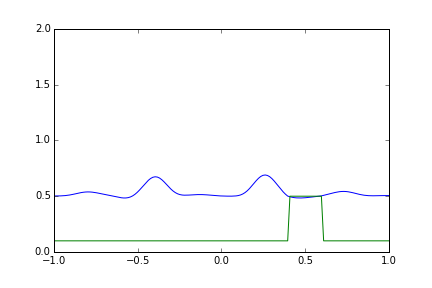
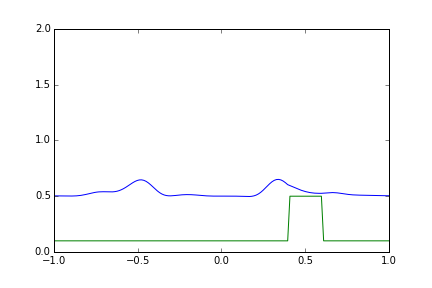
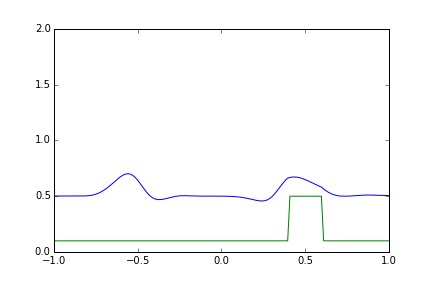
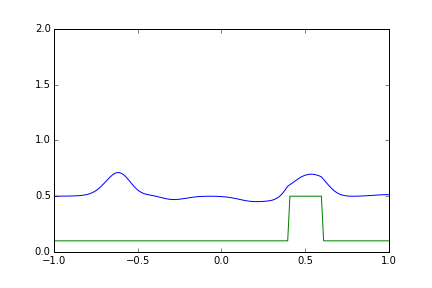
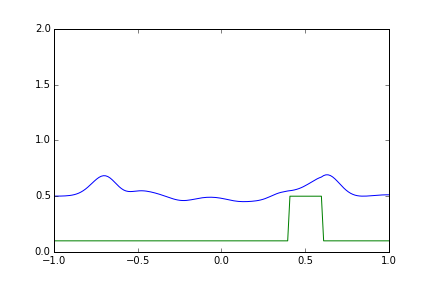
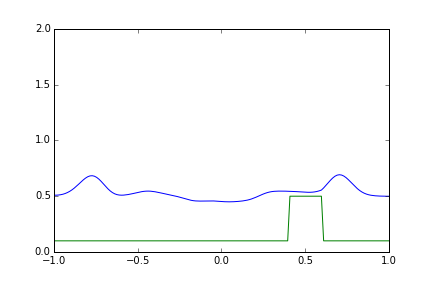
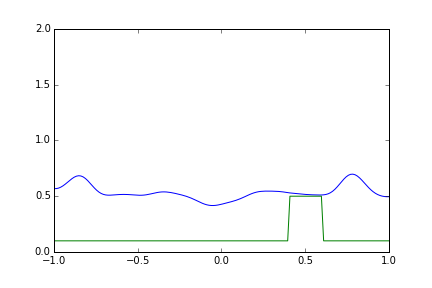
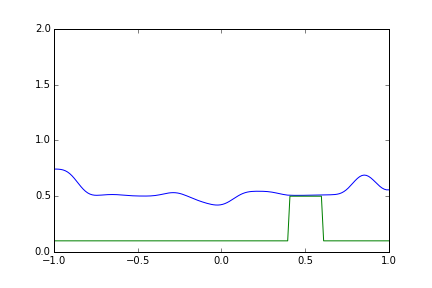
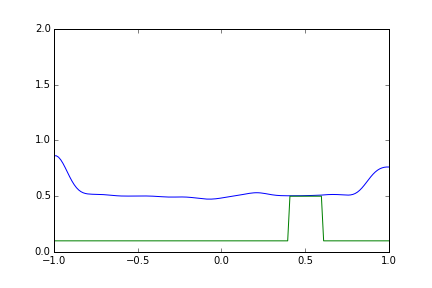
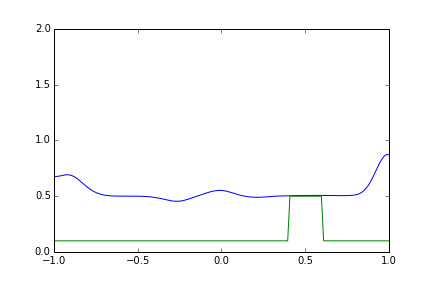
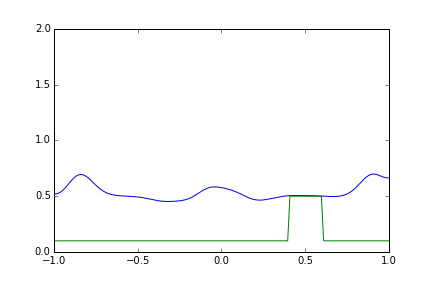
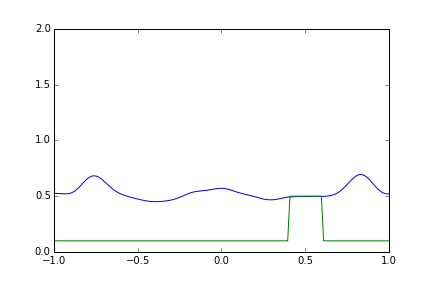
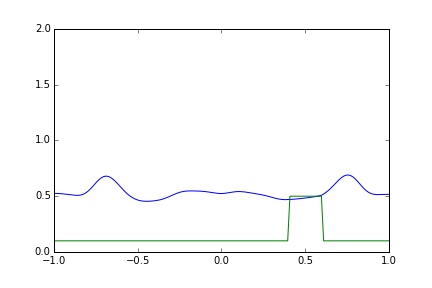
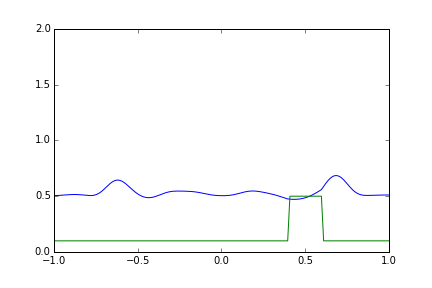
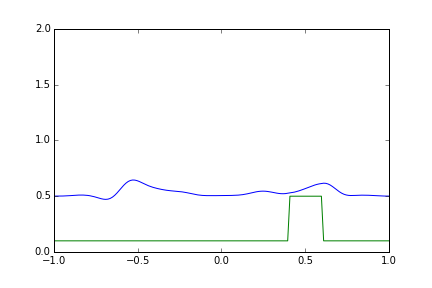
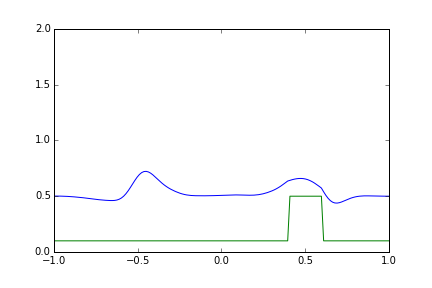
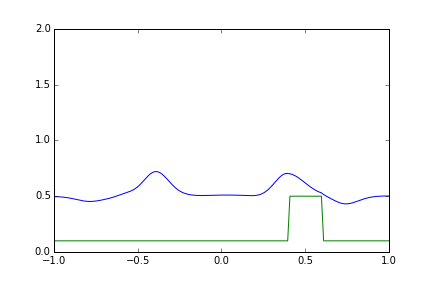
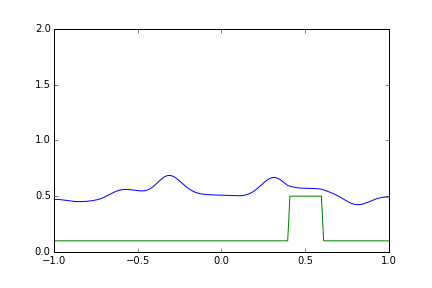
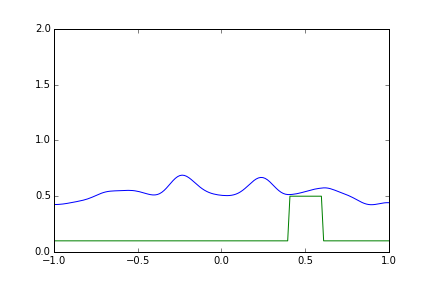
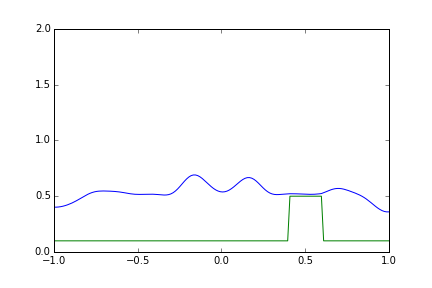
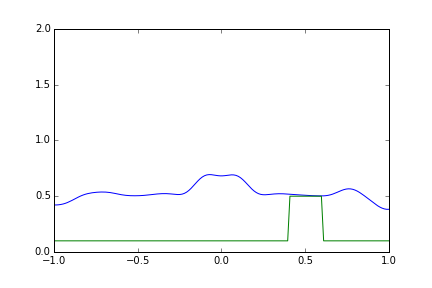
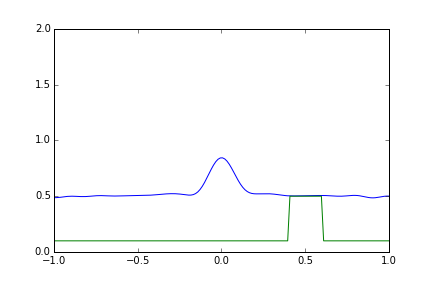
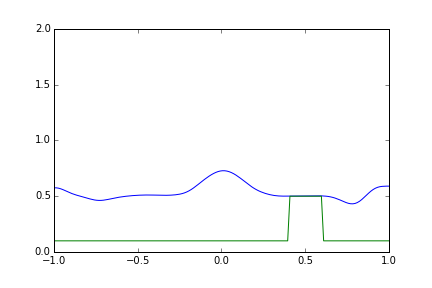
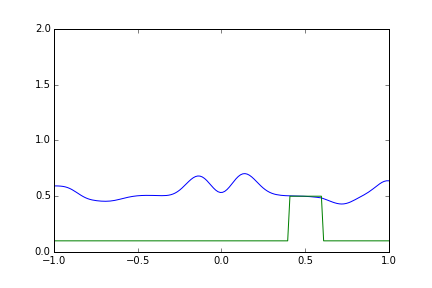
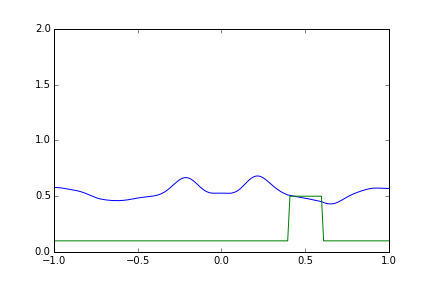
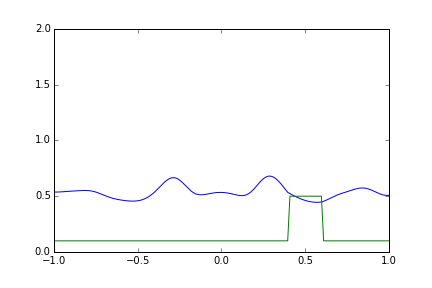
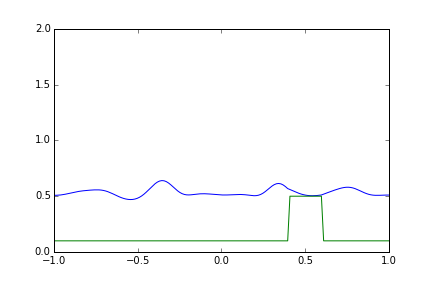
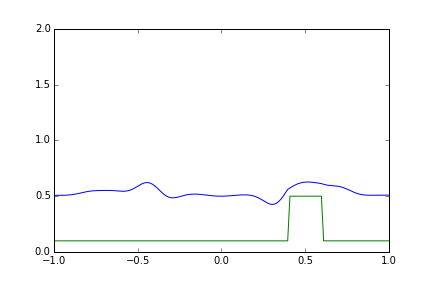
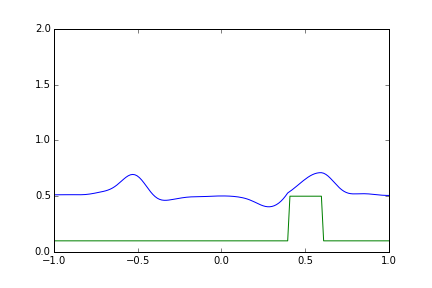
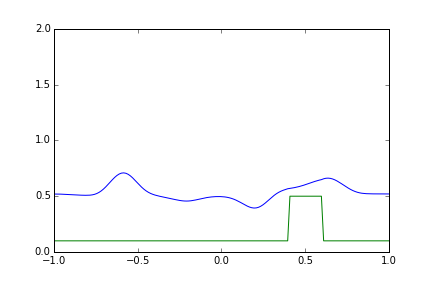
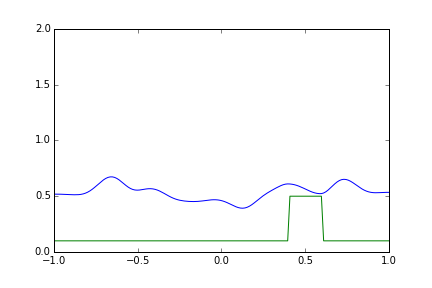
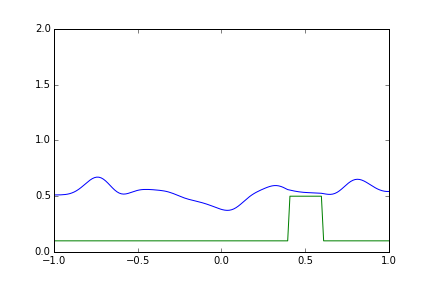
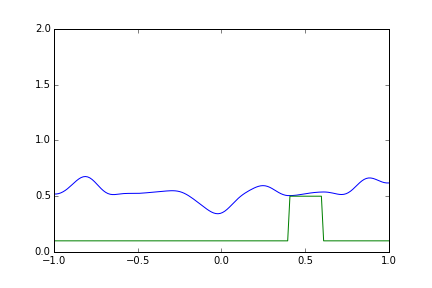
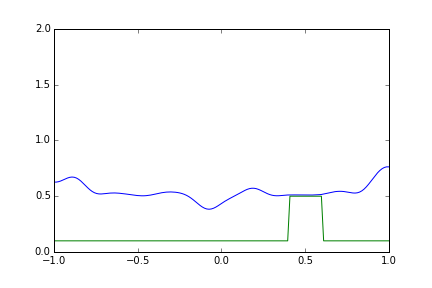
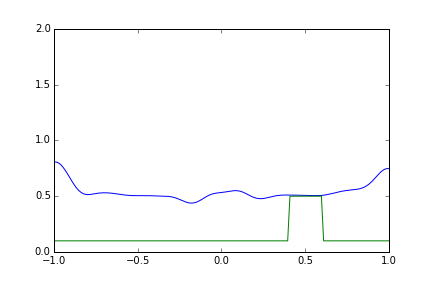
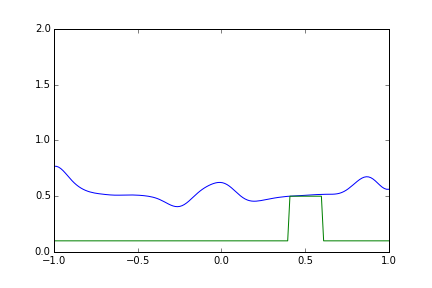
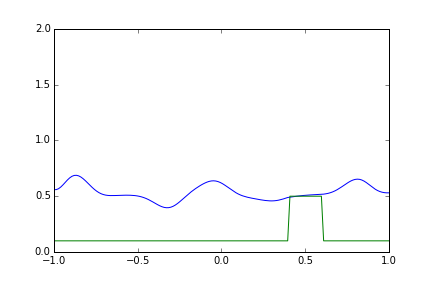
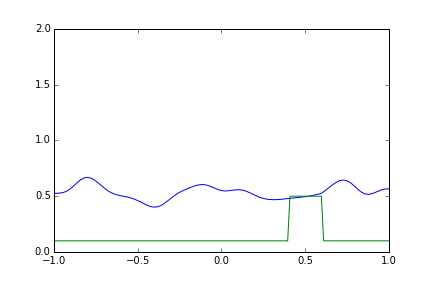
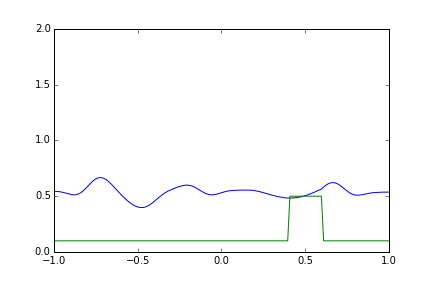
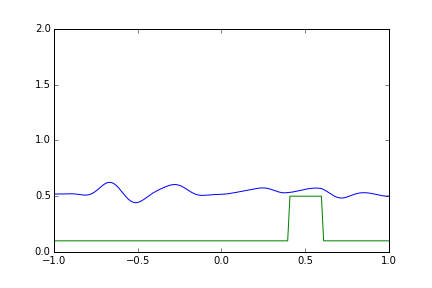
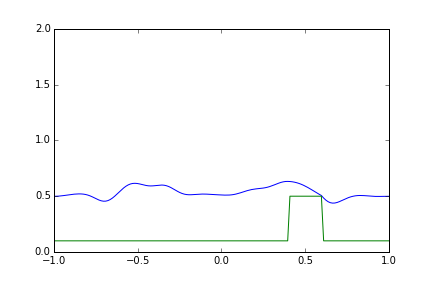
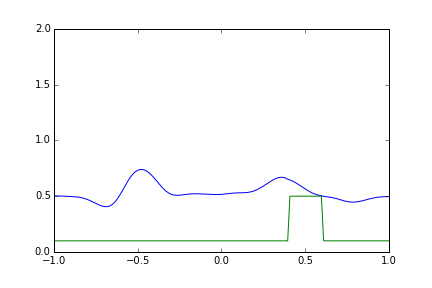
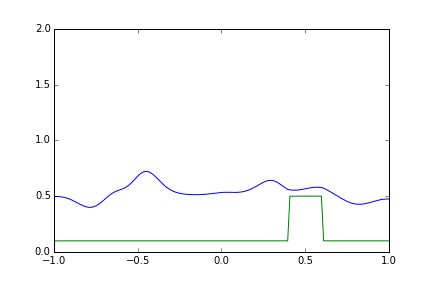
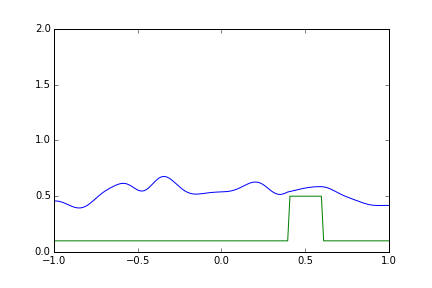
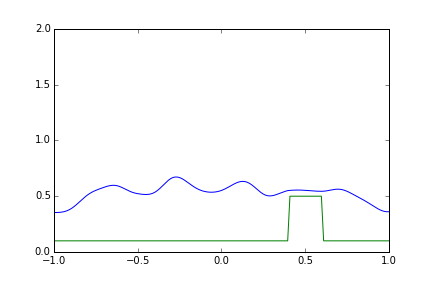
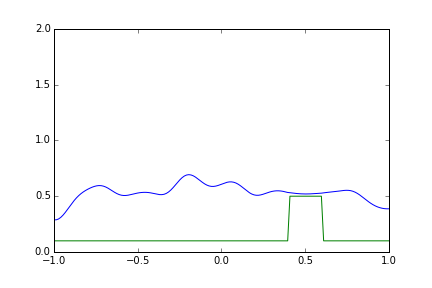
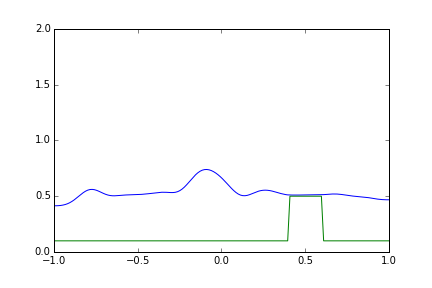
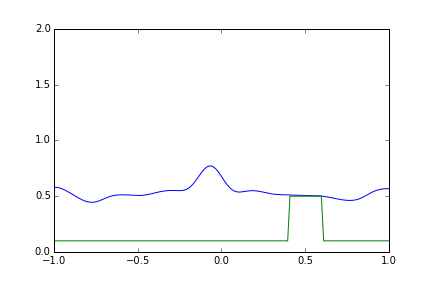
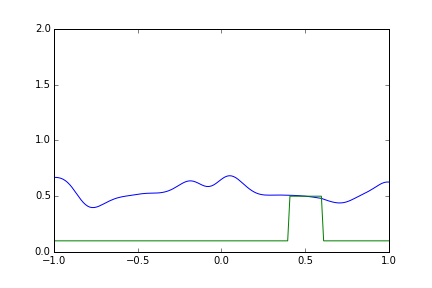
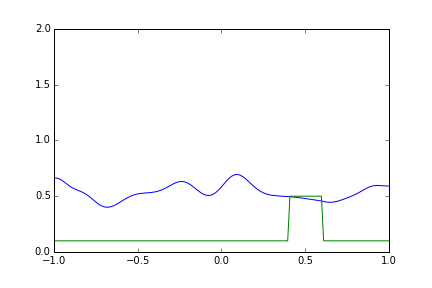
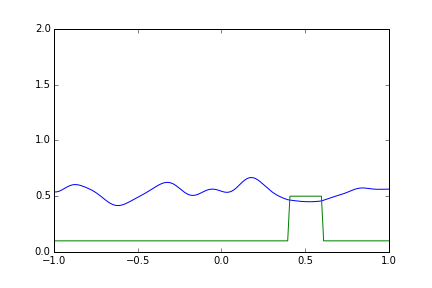
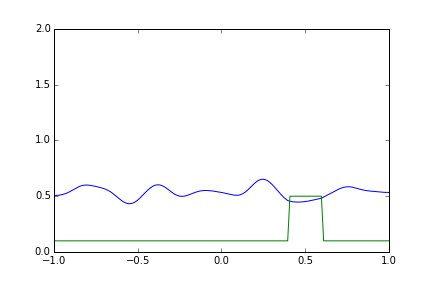
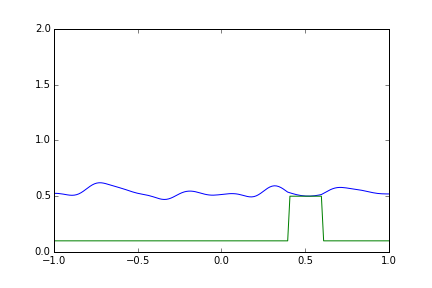
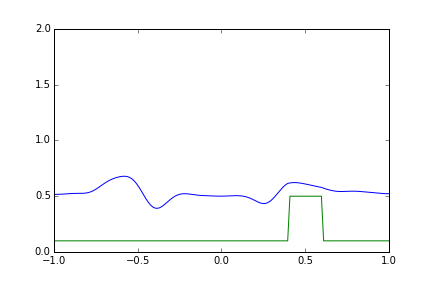
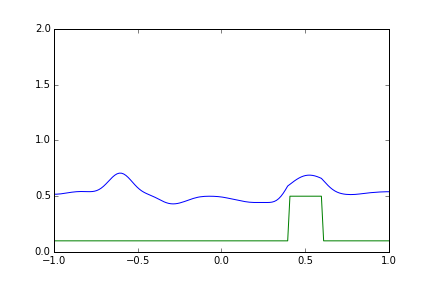
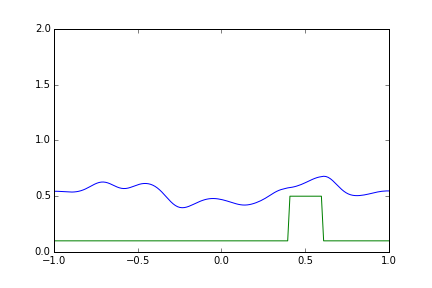
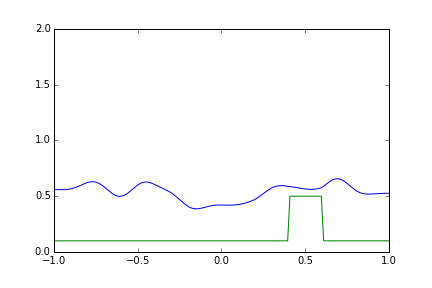
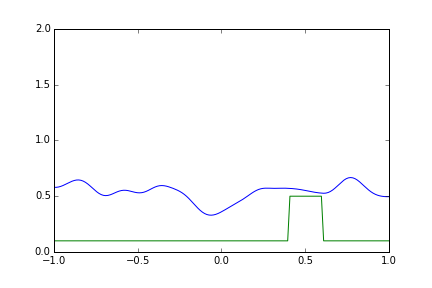
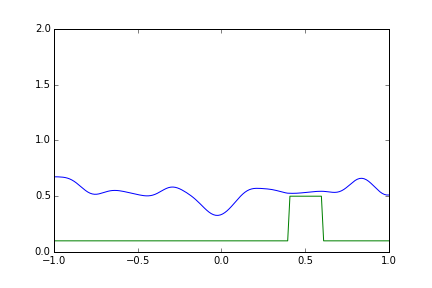
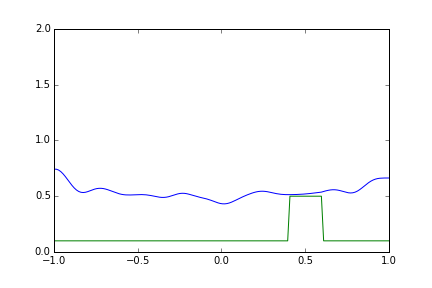
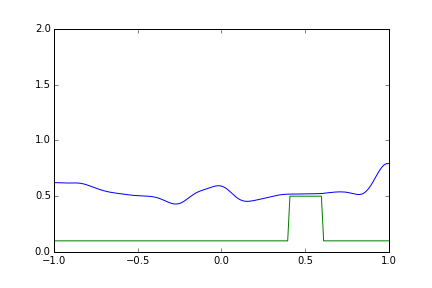
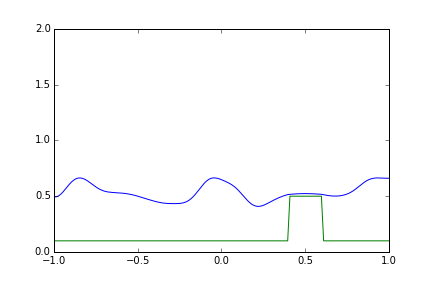
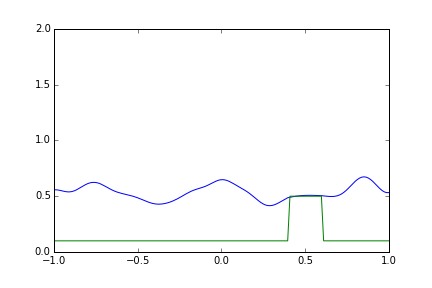
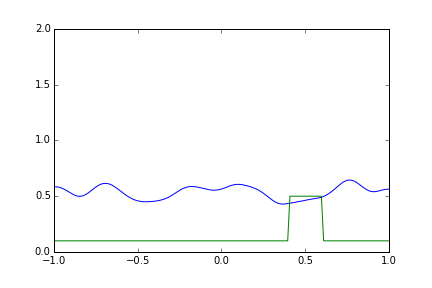
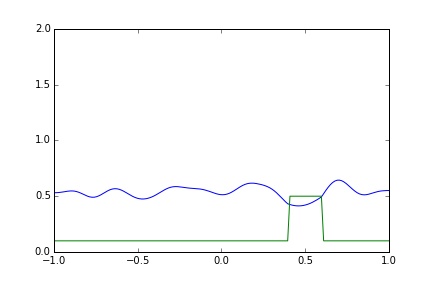
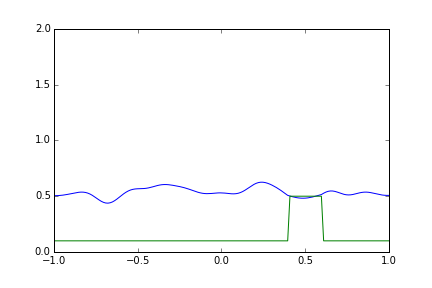
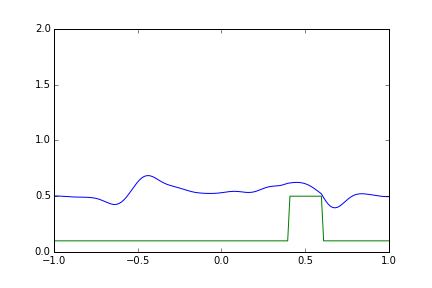
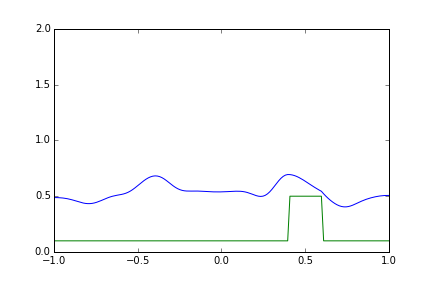
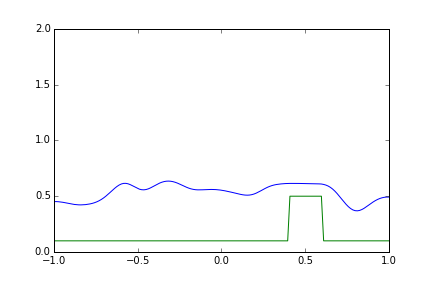
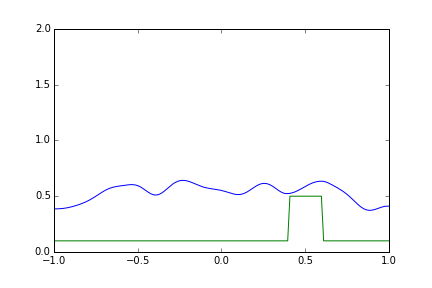

In [46]:
from matplotlib import animation
from JSAnimation import IPython_display
fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(0,2))
l, = plt.plot(x,(u[0,:]-0.5)*40+0.5)
plt.plot(x,h)
def animate(i):
    l.set_ydata((u[i*100,:]-0.5)*40+0.5)
    return l
animation.FuncAnimation(fig, animate, frames=100, interval=30)

Alturas negativas :(